In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
sns.set_theme(style="whitegrid")

print("Libraries are ready!")

Libraries are ready!


In [31]:
df = pd.read_csv('student_feedback.csv')
df['Event Date'] = pd.to_datetime(df['Event Date'], dayfirst=True)
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Event Name,Event Type,Department,Event Date,Feedback Comments,Overall Satisfaction
0,0,340,5,2,7,6,9,2,1,8,AI Workshop,Workshop,Computer Science,2024-01-03,Amazing and very helpful!,5.00
1,1,253,6,5,8,6,2,1,2,9,Robotics Challenge,Tech Fest,Mechanical,2024-01-07,Amazing and very helpful!,4.88
2,2,680,7,7,6,5,4,2,3,1,Business Seminar,Seminar,Business,2024-01-11,Disorganized and waste of time.,4.38
3,3,806,9,6,7,1,5,9,4,6,Cultural Night,Cultural,Student Affairs,2024-01-15,"It was okay, but could be better.",5.88
4,4,632,8,10,8,4,6,6,9,9,Code-a-thon,Tech Fest,Computer Science,2024-01-19,Amazing and very helpful!,7.50


In [32]:
def analyze_sentiment(text):

    return TextBlob(str(text)).sentiment.polarity

df['Sentiment_Score'] = df['Feedback Comments'].apply(analyze_sentiment)


def get_label(score):
    if score > 0.1: return 'Positive'
    elif score < -0.1: return 'Negative'
    else: return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(get_label)

print("AI reading complete. Every comment now has a sentiment label!")

AI reading complete. Every comment now has a sentiment label!


/tmp/ipython-input-957949506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_events, x='Overall Satisfaction', y='Event Name', palette='viridis')


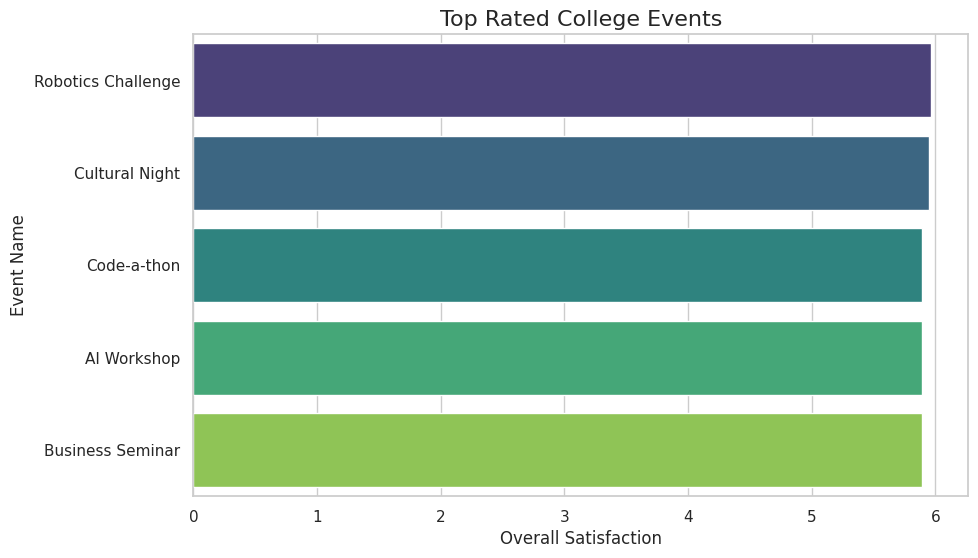

In [33]:
top_events = df.groupby('Event Name')['Overall Satisfaction'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_events, x='Overall Satisfaction', y='Event Name', palette='viridis')
plt.title('Top Rated College Events', fontsize=16)
plt.show()

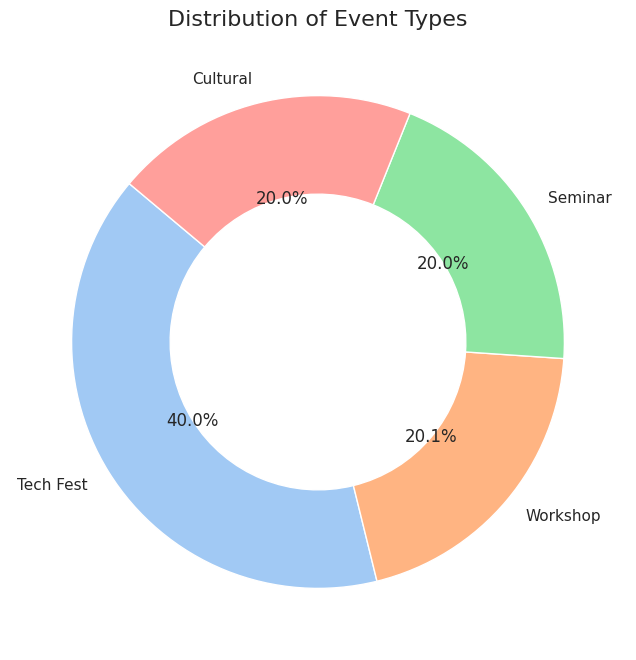

In [34]:

event_counts = df['Event Type'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'),
        wedgeprops=dict(width=0.4))

plt.title('Distribution of Event Types', fontsize=16)
plt.show()

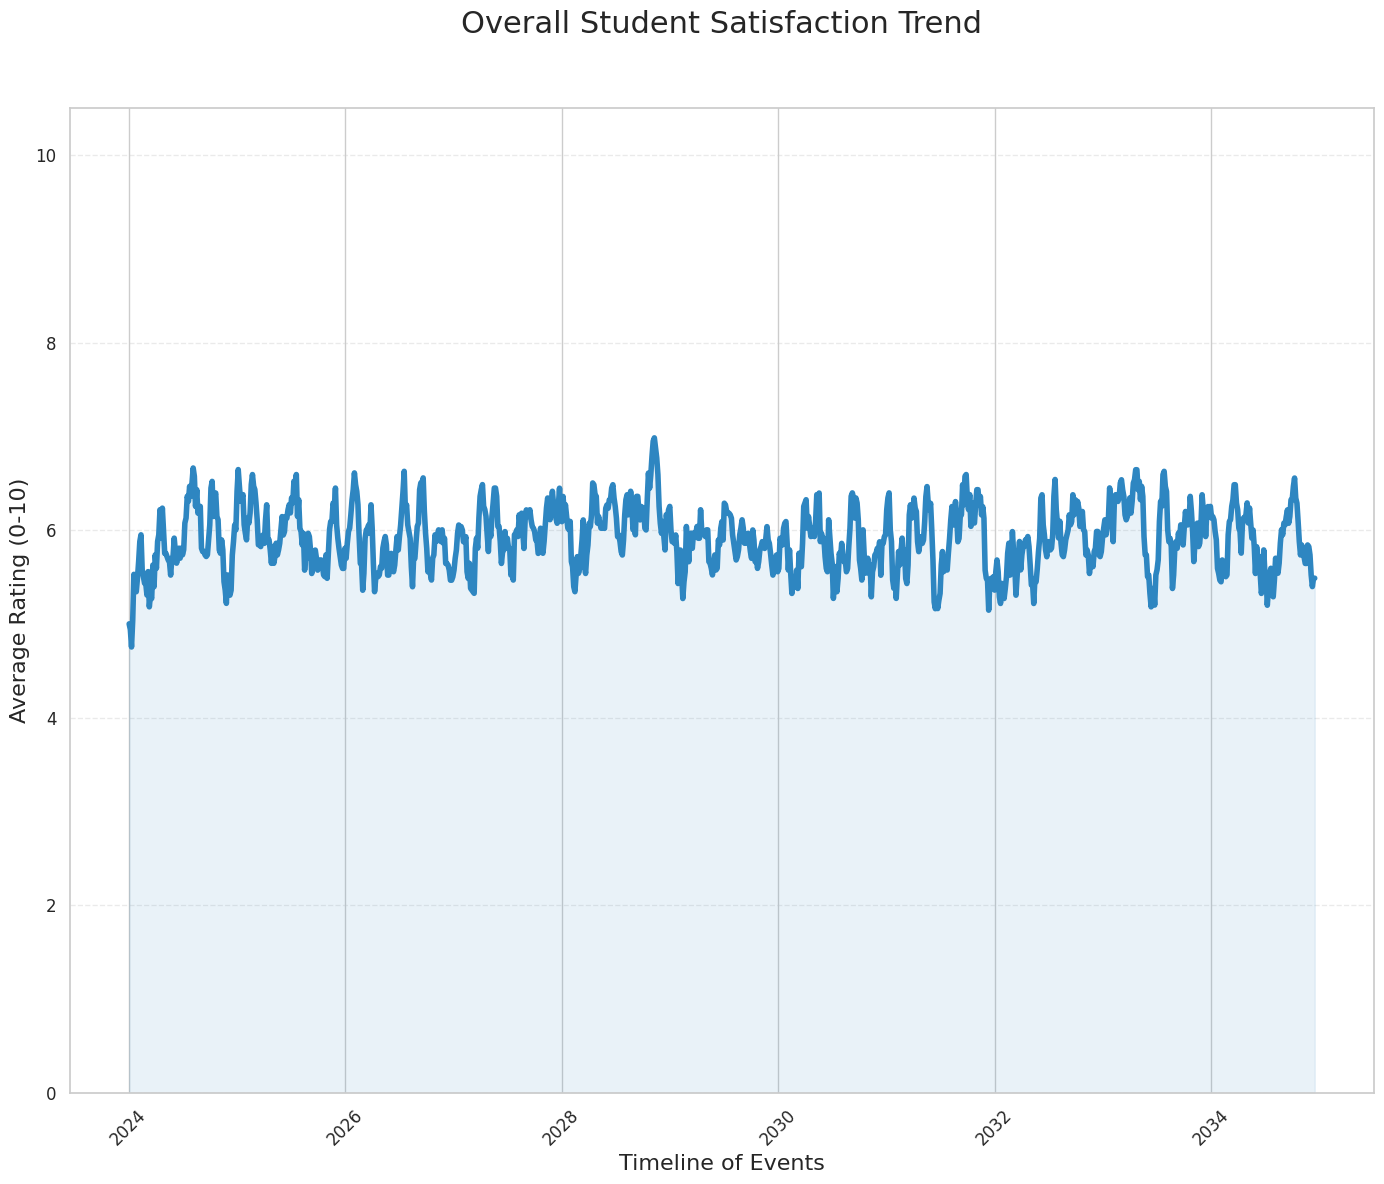

In [37]:
target_col = [col for col in df.columns if 'Satisfaction' in col][0]


daily_avg = df.groupby('Event Date')[target_col].mean().sort_index()
smoothed_trend = daily_avg.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(14, 12))
plt.plot(smoothed_trend.index, smoothed_trend.values, color='#2E86C1', linewidth=4)
plt.fill_between(smoothed_trend.index, smoothed_trend.values, color='#2E86C1', alpha=0.1)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.title('Overall Student Satisfaction Trend\n', fontsize=22, pad=30)
plt.ylabel('Average Rating (0-10)', fontsize=16)
plt.xlabel('Timeline of Events', fontsize=16)
plt.ylim(0, 10.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

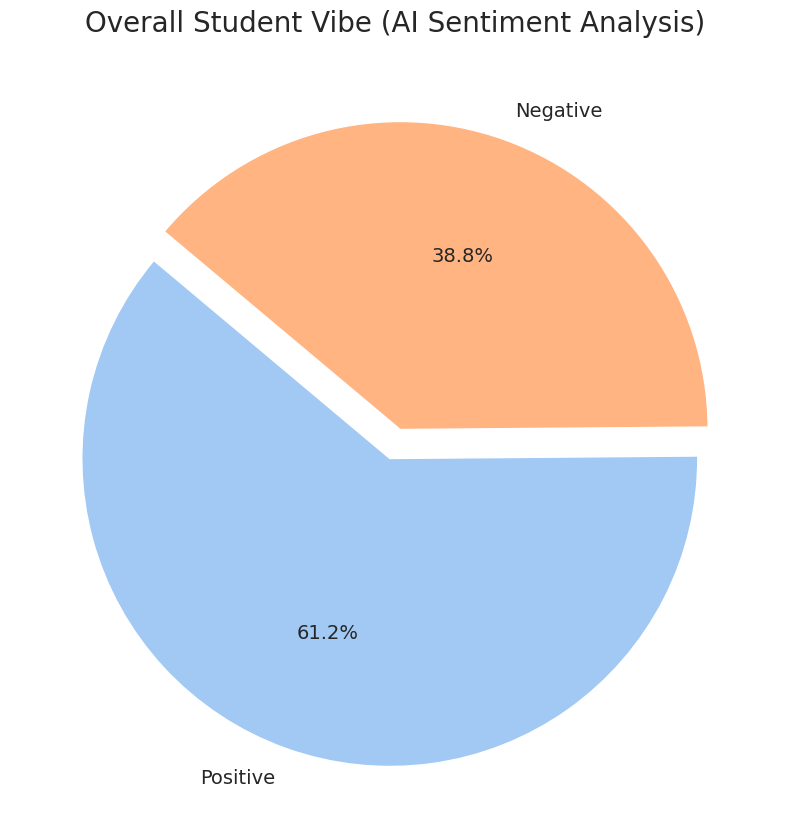

Sentiment Breakdown:
Sentiment_Label
Positive    613
Negative    388
Name: count, dtype: int64


In [36]:
sentiment_counts = df['Sentiment_Label'].value_counts()
num_categories = len(sentiment_counts)

plt.figure(figsize=(10, 10))


dynamic_explode = [0.05] * num_categories


plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel', n_colors=num_categories),
        explode=dynamic_explode,
        textprops={'fontsize': 14})

plt.title('Overall Student Vibe (AI Sentiment Analysis)', fontsize=20, pad=20)
plt.show()


print("Sentiment Breakdown:")
print(sentiment_counts)

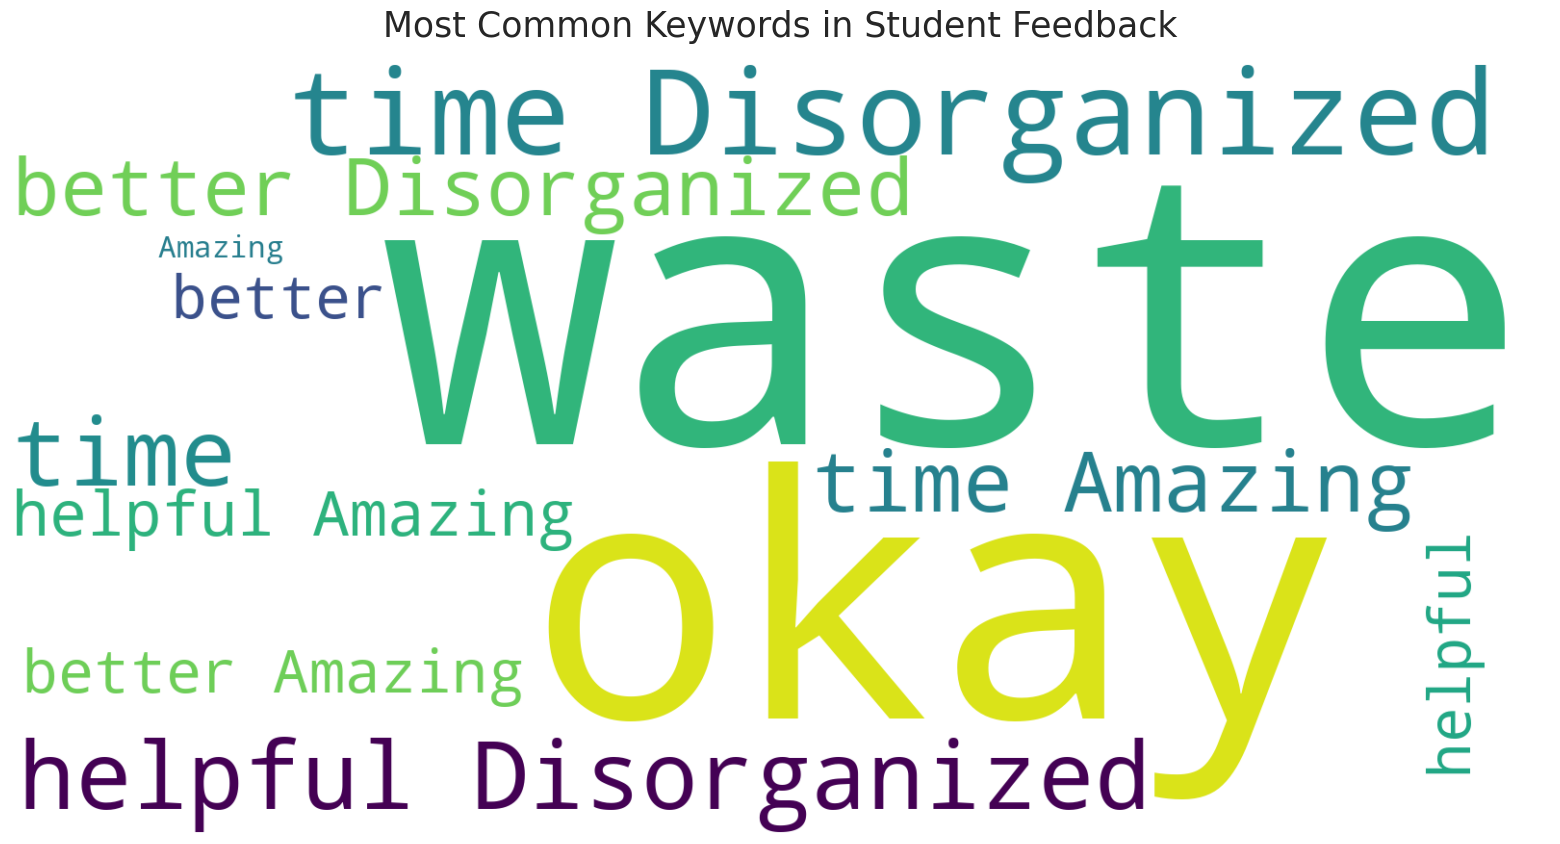

In [38]:
from wordcloud import WordCloud

text = " ".join(review for review in df['Feedback Comments'])


wordcloud = WordCloud(width=1600, height=800,
                      background_color='white',
                      colormap='viridis',
                      max_words=100).generate(text)


plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Keywords in Student Feedback", fontsize=25, pad=20)
plt.show()

In [39]:
#Top Event
target_col = [col for col in df.columns if 'Satisfaction' in col][0]
top_event_name = df.groupby('Event Name')[target_col].mean().idxmax()
top_event_score = df.groupby('Event Name')[target_col].mean().max()

#Sentiment Percentages
sentiment_dist = df['Sentiment_Label'].value_counts(normalize=True) * 100
top_sentiment = sentiment_dist.idxmax()

#"Dip" month
monthly_avg = df.set_index('Event Date')[target_col].resample('ME').mean()
worst_month = monthly_avg.idxmin().strftime('%B')

#Best Event Type for budget allocation
best_type = df.groupby('Event Type')[target_col].mean().idxmax()

print(f"--- RESULTS FOR YOUR SUMMARY ---")
print(f"Top Event: {top_event_name} (Score: {top_event_score:.2f})")
print(f"Main Vibe: {top_sentiment} ({sentiment_dist.max():.1f}%)")
print(f"Worst Month: {worst_month}")
print(f"Recommended Budget Focus: {best_type}")

--- RESULTS FOR YOUR SUMMARY ---
Top Event: Robotics Challenge (Score: 5.97)
Main Vibe: Positive (61.2%)
Worst Month: December
Recommended Budget Focus: Cultural


Final Analysis & Recommendations
Trend Observation: The satisfaction levels remained Quite Stable over the year. The peaks in the graph correlate with the most successful events.

Top Event: The highest-rated event was Robotics Challenge (Score: 5.97), suggesting that students prefer this specific format.

Sentiment Analysis: Most comments were Positive(61.2%), indicating a generally healthy campus atmosphere.

Recommendation: Based on the data, we should allocate more budget to Cultural events and investigate the dip in satisfaction seen in December.